In [1]:
from IPython.display import SVG
from sklearn.datasets import load_digits
from keras.utils.vis_utils import model_to_dot
from keras.models import Sequential, Model
from keras.layers import *

Using TensorFlow backend.


### Load dataset
- digits dataset in scikit-learn
- url: http://scikit-learn.org/stable/auto_examples/datasets/plot_digits_last_image.html

In [2]:
data = load_digits()

In [3]:
X_data = data.images
y_data = data.target

In [4]:
# flatten X_data
X_data = X_data.reshape(X_data.shape[0], X_data.shape[1]*X_data.shape[2])

In [5]:
# shape of data
print(X_data.shape)
print(y_data.shape)    

(1797, 64)
(1797,)


## Model Functional API
- Creating models by Sequential API is easy and simple, but it is impossible to create complicated model structures
- For instance, inception or residual net structure is impossible to implement using Sequential API since they require operations such as layer merging and multiple outputs
- In this case, one could take advantage of Functional API
    - Create model by defining inputs and outputs

<br>
<img src="http://www.deeplearningmodel.net/img/googlenet/googlenet_block.png" style="width: 300px"/>
<center> **Inception Module in GoogleNet** </center>

<img src="http://cv-tricks.com/wp-content/uploads/2017/03/600x299xResNet.png.pagespeed.ic.M1J-VkbWPB.png" style="width: 300px"/>
<center> **Resudiual Structure in ResNet** </center>

### Single input & output
- Model with only single input & output
- Such structure is able to create using Sequential API as well

In [6]:
# creating layers
input_layer = Input(shape = X_data.shape[1:])
activation_1 = Activation('relu')(input_layer)
hidden_layer = Dense(50)(activation_1)
activation_2 = Activation('relu')(hidden_layer)
output_layer = Dense(10, activation = 'softmax')(activation_2)

In [7]:
# creating model
model = Model(inputs = input_layer, outputs = output_layer)

In [8]:
model.summary()

Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 64)                0         
_________________________________________________________________
activation_1 (Activation)    (None, 64)                0         
_________________________________________________________________
dense_1 (Dense)              (None, 50)                3250      
_________________________________________________________________
activation_2 (Activation)    (None, 50)                0         
_________________________________________________________________
dense_2 (Dense)              (None, 10)                510       
Total params: 3,760
Trainable params: 3,760
Non-trainable params: 0
_________________________________________________________________


### Merging layers
- Sometimes, it is necessary to merge layers (e.g., GoogleNet or ResNet)

#### 1. concatenate
- concatenate() simply merges results of two or more layers
- For instance, assume there are two layers to be concatenated, whose results are
**[x1, x2, ..., xn]** and **[y1, y2, ..., yn]**. Then, concatenated layer would be **[x1, ..., xn, ..., y1, ..., yn]**

In [12]:
# creating layers
input_layer = Input(shape = X_data.shape[1:])
activation_1 = Activation('relu')(input_layer)
hidden_layer_1 = Dense(50, activation = 'relu')(activation_1)
hidden_layer_2 = Dense(50, activation = 'relu')(activation_1)
concat_layer = concatenate([hidden_layer_1, hidden_layer_2])
output_layer = Dense(10, activation = 'softmax')(concat_layer)
print(hidden_layer_1.shape)
print(hidden_layer_2.shape)
print(concat_layer.shape)

(?, 50)
(?, 50)
(?, 100)


In [13]:
model = Model(inputs = input_layer, outputs = output_layer)

In [14]:
model.summary()

Model: "model_3"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_4 (InputLayer)            (None, 64)           0                                            
__________________________________________________________________________________________________
activation_5 (Activation)       (None, 64)           0           input_4[0][0]                    
__________________________________________________________________________________________________
dense_8 (Dense)                 (None, 50)           3250        activation_5[0][0]               
__________________________________________________________________________________________________
dense_9 (Dense)                 (None, 50)           3250        activation_5[0][0]               
____________________________________________________________________________________________

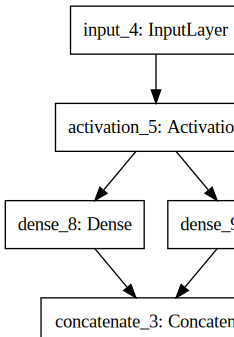

In [16]:
SVG(model_to_dot(model).create(prog='dot', format='svg'))

#### 2. add, subtract, multiply, average, maximum
- Such layers perform element-wise operations over all corresponding elements of two or more layers
- Hence, dimensionality of the input layers are preserved

In [17]:
# creating layers
input_layer = Input(shape = X_data.shape[1:])
activation_1 = Activation('relu')(input_layer)
hidden_layer_1 = Dense(50, activation = 'relu')(activation_1)
hidden_layer_2 = Dense(50, activation = 'relu')(activation_1)
add_layer = add([hidden_layer_1, hidden_layer_2])
output_layer = Dense(10, activation = 'softmax')(add_layer)

print(hidden_layer_1.shape)
print(hidden_layer_2.shape)
print(add_layer.shape)

(?, 50)
(?, 50)
(?, 50)


Model: "model_4"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_5 (InputLayer)            (None, 64)           0                                            
__________________________________________________________________________________________________
activation_6 (Activation)       (None, 64)           0           input_5[0][0]                    
__________________________________________________________________________________________________
dense_11 (Dense)                (None, 50)           3250        activation_6[0][0]               
__________________________________________________________________________________________________
dense_12 (Dense)                (None, 50)           3250        activation_6[0][0]               
____________________________________________________________________________________________

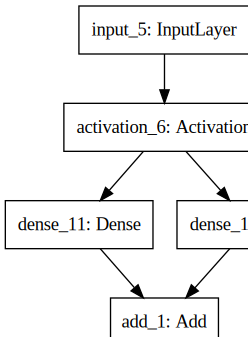

In [18]:
model = Model(inputs = input_layer, outputs = output_layer)

model.summary()

SVG(model_to_dot(model).create(prog='dot', format='svg'))

#### 3. dot
- dot() performs inner product operation between two layer results
- 'axes' should be defined to perform the operation

In [19]:
# creating layers
input_layer = Input(shape = X_data.shape[1:])
activation_1 = Activation('relu')(input_layer)
hidden_layer_1 = Dense(50, activation = 'relu')(activation_1)
hidden_layer_2 = Dense(50, activation = 'relu')(activation_1)
dot_layer = dot([hidden_layer_1, hidden_layer_2], axes = -1)
output_layer = Dense(10, activation = 'softmax')(dot_layer)

print(hidden_layer_1.shape)
print(hidden_layer_2.shape)
print(dot_layer.shape)

(?, 50)
(?, 50)
(?, 1)


Model: "model_5"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_6 (InputLayer)            (None, 64)           0                                            
__________________________________________________________________________________________________
activation_7 (Activation)       (None, 64)           0           input_6[0][0]                    
__________________________________________________________________________________________________
dense_14 (Dense)                (None, 50)           3250        activation_7[0][0]               
__________________________________________________________________________________________________
dense_15 (Dense)                (None, 50)           3250        activation_7[0][0]               
____________________________________________________________________________________________

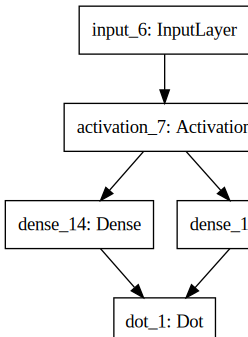

In [20]:
model = Model(inputs = input_layer, outputs = output_layer)

model.summary()

SVG(model_to_dot(model).create(prog='dot', format='svg'))